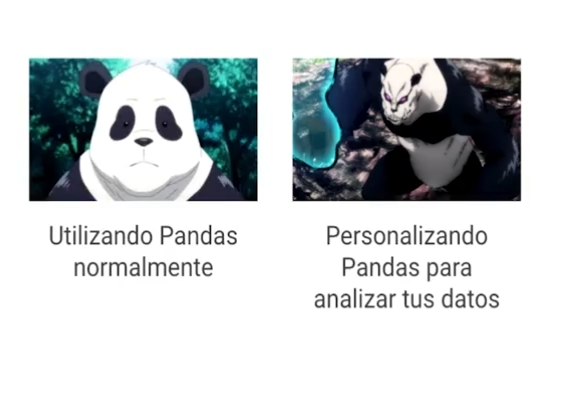

## Importar librería

In [1]:
import pandas as pd

## Datos de prueba

In [3]:
df = pd.DataFrame.from_dict(
    data = {
        "a": list("asdfasdfas"),
        "b": range(0, 10)
    }
)

df.iloc[2:5, 0] = None
df.iloc[6:7, 1] = None

df

,a,b
0,a,0.0
1,s,1.0
2,None,2.0
3,None,3.0
4,None,4.0
5,s,5.0
6,d,NaN
7,f,7.0
8,a,8.0
9,s,9.0


In [4]:
df.a.str

In [5]:
df.missing

AttributeError: 'DataFrame' object has no attribute 'missing'

## Crear una nueva clase para extender pandas

In [18]:
@pd.api.extensions.register_dataframe_accessor("missing") # Para acceder a las funciones de pd que tratan con objetos DataFrame
# Lo que va en string es el nombre del acceso que queremos
class MissingMethods:

    def __init__(self, pandas_obj):
        self._df = pandas_obj

    def number_missing(self):
        return self._df.isna().sum().sum()
    
    def  number_complete(self):
        return self._df.size - self._df.missing.number_missing() # reutilizamos funciones de la misma clase
    



# Nos advertira de que estamos tratando de sobreescrivir un atributo que ya existe, pero aqui no es importante ya que lo ejecutamos solo una vez en el notebook

/tmp/ipykernel_445/832718117.py:3: UserWarning: registration of accessor <class '__main__.MissingMethods'> under name 'missing' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class MissingMethods:


## Probar uso

In [19]:
df = pd.DataFrame(df)

In [20]:
df.missing.number_missing()

4

In [21]:
df.missing.number_complete()

16

Basicamente esto seria para automatizar algunos procesos en el manejo de datos, con funciones integradas dentro del mismo pandas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>